<a href="https://colab.research.google.com/github/ahitaahi/projects/blob/main/parkinson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0xffffffff
cpu MHz		: 2200.238
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa mmio_stale_data retbleed bhi
bogomips	: 4400.47
clflush size	: 64
cache_alignment	: 64
ad

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
from tqdm.notebook import tqdm
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('parkinson_disease.csv')


In [ ]:
df.shape


(298, 755)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Columns: 755 entries, id to class
dtypes: float64(750), int64(5)
memory usage: 1.7 MB


In [ ]:
df.describe()


,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,298.000000,...,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,49.167785,0.567114,0.747855,0.696085,0.494707,316.090604,314.885906,0.006495,0.000409,0.002326,...,25.164716,22.306055,18.892262,14.709299,13.013812,13.358752,15.899978,15.807837,33.867111,0.777778
std,28.723787,0.496309,0.164707,0.072136,0.136105,93.143395,93.318796,0.001765,0.000780,0.002264,...,42.636020,34.070592,26.044338,21.075366,19.116934,17.224017,16.289020,14.543743,34.325941,0.416441
min,0.000000,0.000000,0.041551,0.552210,0.178730,84.000000,83.000000,0.003168,0.000011,0.000210,...,1.520400,1.585000,1.582900,1.747200,1.842200,1.948700,1.861700,1.955900,2.517500,0.000000
25%,24.250000,0.000000,0.763890,0.635250,0.392730,245.000000,242.500000,0.005292,0.000050,0.001053,...,2.532600,3.458000,3.331300,3.059400,2.898300,3.114400,3.943900,3.988300,4.082100,1.000000
50%,49.000000,1.000000,0.810015,0.688025,0.493685,308.000000,306.500000,0.006230,0.000078,0.001645,...,5.222500,6.691400,6.260500,4.872800,4.048800,4.745600,7.608700,8.594900,13.349000,1.000000
75%,74.000000,1.000000,0.836310,0.759255,0.589510,365.000000,364.000000,0.007604,0.000173,0.002520,...,20.075100,21.658900,21.873000,14.546700,11.017700,15.585000,23.146400,24.619800,64.323900,1.000000
max,99.000000,1.000000,0.887630,0.852640,0.834780,609.000000,608.000000,0.012966,0.003245,0.016390,...,201.863500,158.979100,121.256900,100.706500,84.697500,72.302800,62.007300,51.057700,104.223400,1.000000


In [ ]:
df = df.groupby('id').mean().reset_index()
df.drop('id', axis=1, inplace=True)


KeyError: 'id'

In [ ]:
df = pd.read_csv('parkinson_disease.csv')
# Check if the 'id' column exists in the DataFrame
if 'id' in df.columns:
    df = df.groupby('id').mean().reset_index()
    df.drop('id', axis=1, inplace=True)
else:
    print("Column 'id' not found in the DataFrame. Skipping groupby and drop operations.")

In [ ]:
columns = list(df.columns)
for col in columns:
    if col == 'class':
        continue

    filtered_columns = [col]
    for col1 in df.columns:
        if((col == col1) | (col == 'class')):
            continue

        val = df[col].corr(df[col1])

        if val > 0.7:
            # If the correlation between the two
            # features is more than 0.7 remove
            columns.remove(col1)
            continue
        else:
            filtered_columns.append(col1)

    # After each iteration filter out the columns
    # which are not highly correlated features.
    df = df[filtered_columns]
df.shape


(100, 272)

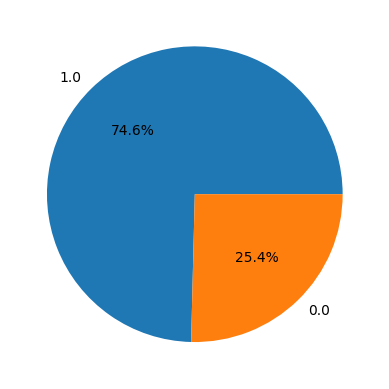

In [ ]:
x = df['class'].value_counts()
plt.pie(x.values,
        labels = x.index,
        autopct='%1.1f%%')
plt.show()


In [ ]:
features = df.drop('class', axis=1)
target = df['class']

X_train, X_val,\
    Y_train, Y_val = train_test_split(features, target,
                                      test_size=0.2,
                                      random_state=10)
X_train.shape, X_val.shape


((201, 753), (51, 753))

In [ ]:
# As the data was highly imbalanced we will balance
#  it by adding repetitive rows of minority class.
ros = RandomOverSampler(sampling_strategy='minority',
                        random_state=0)
X, Y = ros.fit_resample(X_train, Y_train)
X.shape, Y.shape


((302, 753), (302,))

In [ ]:
from sklearn.metrics import roc_auc_score as ras
models = [LogisticRegression(), XGBClassifier(), SVC(kernel='rbf', probability=True)] # Set probability to True

for i in range(len(models)):
    models[i].fit(X, Y)

    print(f'{models[i]} : ')

    train_preds = models[i].predict_proba(X)[:, 1]
    print('Training Accuracy : ', ras(Y, train_preds))

    val_preds = models[i].predict_proba(X_val)[:, 1]
    print('Validation Accuracy : ', ras(Y_val, val_preds))
    print()

# This code is modified by Susobhan Akhuli


LogisticRegression() : 
Training Accuracy :  0.7595719485987457
Validation Accuracy :  0.6081081081081081

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  1.0
Validation Accuracy :  0.8513513513513513

SVC(probability=True) : 
Training Accuracy :  0.7554931801236788

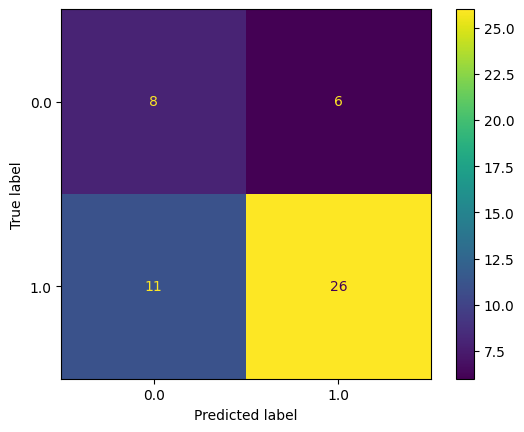

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(models[0], X_val, Y_val)
plt.show()

# This code is modified by Susobhan Akhuli


In [ ]:
print(metrics.classification_report
      (Y_val, models[0].predict(X_val)))


              precision    recall  f1-score   support

         0.0       0.42      0.57      0.48        14
         1.0       0.81      0.70      0.75        37

    accuracy                           0.67        51
   macro avg       0.62      0.64      0.62        51
weighted avg       0.71      0.67      0.68        51

